In [1]:
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Data Normalisation
from sklearn.preprocessing import StandardScaler

# Test Train Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier

# Evaluation 
from sklearn.metrics import accuracy_score

# 1.0 Merge Target Variable with Training Set Data

In [2]:
df_values = pd.read_csv('../datasets/train_features_water.csv')
df_labels = pd.read_csv('../datasets/train_labels_water.csv')

In [3]:
# left join on ID column
df_combined = df_values.merge(df_labels, on='id', how='left')

In [4]:
df_combined

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [5]:
# df_combined.to_csv('./datasets/Combined_Training_Set.csv')

# 2.0 Data Quality Assessment

In [6]:
df_combined.shape

(59400, 41)

In [7]:
df_combined.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## 2.1 Duplicated Data

In [9]:
df_combined[df_combined.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


No duplicated rows. 

## 2.2 Missing Data

In [10]:
df_combined.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## 2.3 Funder

In [11]:
df_combined['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Wafidhi Wa Ziwa T            1
Misana George                1
Mp Mloka                     1
Tanzania /egypt              1
Legeza Legeza                1
Name: funder, Length: 1897, dtype: int64

In [12]:
df_combined['funder'].isna().sum()

3635

In [13]:
len(df_combined['funder'].unique())

1898

Observations :
- **777** rows contains 0's as their Funder.
- **3635** rows contain NaN values.
- **1898** Unique Elements including NaN.
- Spelling Mistakes are present for similar funder names. Exp: Zao Water Spring & Zao Water Spring X

Suggestions :
- This column might be not important for the modelling process and could be ignored.
- However, binning could be done to classify Funders as a group if required.

## 2.4 Installer

In [14]:
df_combined['installer'].value_counts()

DWE                               17402
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
                                  ...  
Tanzania/ Egypt                       1
ISSAC MOLLEl                          1
Tanzania Egypt Technical Co Op        1
Mohamad Masanga                       1
Sister makulata                       1
Name: installer, Length: 2145, dtype: int64

In [15]:
df_combined['installer'].isna().sum()

3655

In [16]:
len(df_combined['installer'].unique())

2146

Observations :
- **780** rows contain 0 or - as Installer.
- **3655** rows contain NaN values.
- **2146** Unique Elements including NaN.
- Spelling Mistakes are present for similar Installer names. Exp: Dr. Matomola, Dr.Matomola.

Suggestions :
- Spelling Mistakes would have to be corrected at the future if this column is important.
- Binning would have to be done to reduce num of unique instances.

## 2.5 Subvillage / Region

In [17]:
df_combined['subvillage'].value_counts()

Madukani       508
Shuleni        506
Majengo        502
Kati           373
Mtakuja        262
              ... 
Simkinye         1
Seramfo          1
Mwakipanda       1
Mwashilungu      1
Chuo Cha         1
Name: subvillage, Length: 19287, dtype: int64

In [18]:
df_combined['subvillage'].isna().sum()

371

In [19]:
len(df_combined['subvillage'].unique())

19288

Observations :
- Has large number of subvillage's name.
- **371** rows containing NaN data.

Suggestions :
- Drop this column and use **Region** column instead as villages are assigned based on region.

In [20]:
df_combined['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [21]:
df_combined['region'].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

Text(0.5, 1.0, 'Region')

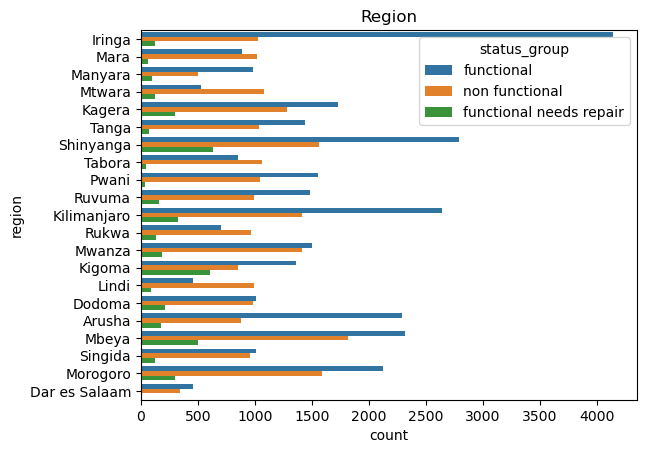

In [22]:
sns.countplot(data=df_combined, y='region', hue='status_group', dodge=1.0)
plt.title('Region')

Observations :
- A region would have the same region code but can have different **district** code.
- Can drop **ward** and **lga** which could be represented by Region.

## 2.6 Public Meeting

In [23]:
df_combined['public_meeting'].unique()

array([True, nan, False], dtype=object)

In [24]:
df_combined['public_meeting'].isna().sum()

3334

In [25]:
df_combined['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

Text(0.5, 1.0, 'Public Meeting')

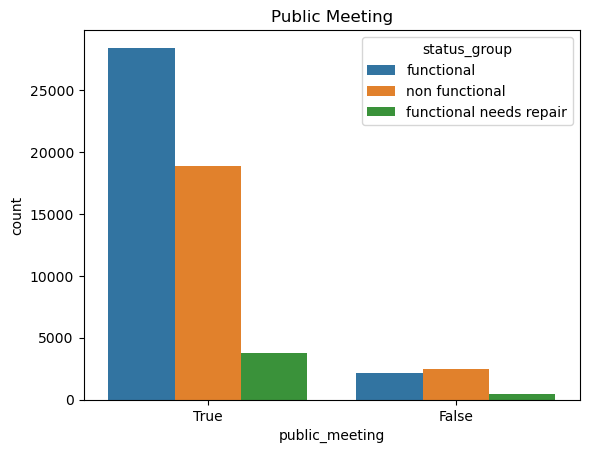

In [26]:
sns.countplot(data=df_combined, x='public_meeting', hue='status_group', dodge=1.0)
plt.title('Public Meeting')

Observations :
- **3334** rows of NaN data.
- Two elements only True or False.
- Likely to be **not important**.

## 2.7 Scheme Management

In [27]:
df_combined['scheme_management'].unique()

array(['VWC', 'Other', nan, 'Private operator', 'WUG', 'Water Board',
       'WUA', 'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC',
       'None'], dtype=object)

In [28]:
df_combined['scheme_management'].isna().sum()

3877

In [29]:
df_combined['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

Text(0.5, 1.0, 'Scheme Manager')

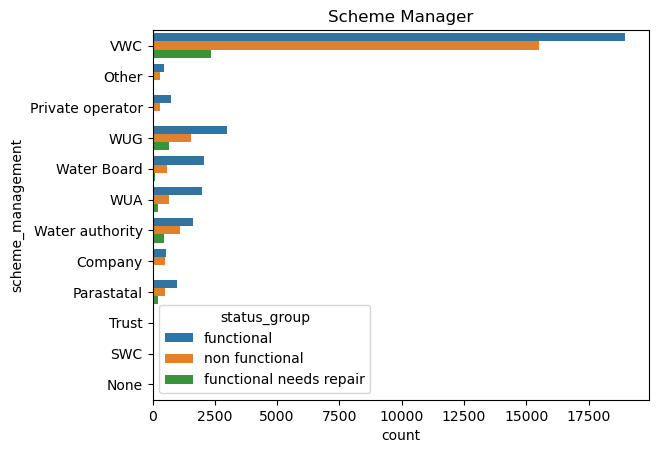

In [30]:
sns.countplot(data=df_combined, y='scheme_management', hue='status_group', dodge=1.0)
plt.title('Scheme Manager')

Observations :
- **3877** rows of NaN data.
- Data is relatively clean.
- scheme_management may not have a scheme_name for each water well altough operated by the same provider

Suggestions :
- Perform data imputation on scheme_management through multivariate chained imputation.
- Use scheme_management and drop **scheme_name** if required.

## 2.8 Permit

In [31]:
df_combined['permit'].unique()

array([False, True, nan], dtype=object)

In [32]:
df_combined['permit'].isna().sum()

3056

In [33]:
df_combined['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

Text(0.5, 1.0, 'Permit')

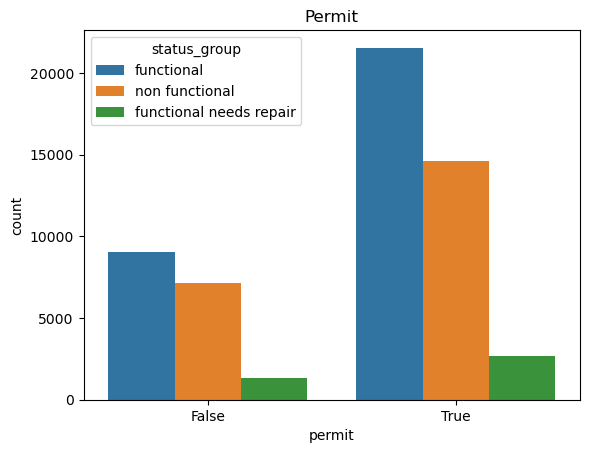

In [34]:
sns.countplot(data=df_combined, x='permit', hue='status_group', dodge=1.0)
plt.title('Permit')

Observations :
- **3056** rows of NaN data.
- Two categories only : True or False

Suggestions :
- Could be dropped if not important.

## 2.9 Construction Year

In [35]:
df_combined.sort_values(by='construction_year', inplace=True)
df_combined['construction_year'].unique()

array([   0, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

In [36]:
df_combined['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

Text(0, 0.5, 'No of Instances')

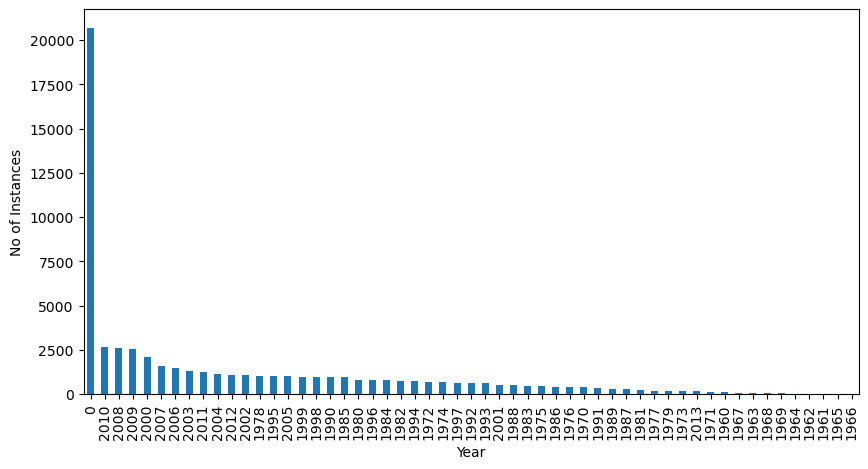

In [37]:
plt.figure(figsize=(10,5))
df_combined['construction_year'].value_counts().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("No of Instances")

Observations :
- Approximately **40%** of rows has construction year of value **0**.

Suggestions :
- Perform data imputation.
- Remain as it is as last resort.

## 2.10 Extraction_Type / Extraction_Type_Group / Extraction_Type_Class

In [38]:
df_combined.sort_values(by='extraction_type', inplace=True)
print(df_combined['extraction_type'].unique())

df_combined.sort_values(by='extraction_type_group', inplace=True)
print(df_combined['extraction_type_group'].unique())

df_combined.sort_values(by='extraction_type_class', inplace=True)
print(df_combined['extraction_type_class'].unique())

['afridev' 'cemo' 'climax' 'gravity' 'india mark ii' 'india mark iii'
 'ksb' 'mono' 'nira/tanira' 'other' 'other - mkulima/shinyanga'
 'other - play pump' 'other - rope pump' 'other - swn 81' 'submersible'
 'swn 80' 'walimi' 'windmill']
['afridev' 'gravity' 'india mark ii' 'india mark iii' 'mono' 'nira/tanira'
 'other' 'other handpump' 'other motorpump' 'rope pump' 'submersible'
 'swn 80' 'wind-powered']
['gravity' 'handpump' 'motorpump' 'other' 'rope pump' 'submersible'
 'wind-powered']


In [39]:
df_combined['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [40]:
df_combined['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [41]:
df_combined['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [42]:
print(len(df_combined['extraction_type'].unique()))

print(len(df_combined['extraction_type_group'].unique()))

print(len(df_combined['extraction_type_class'].unique()))

18
13
7


Text(0.5, 1.0, 'Extraction Type Class')

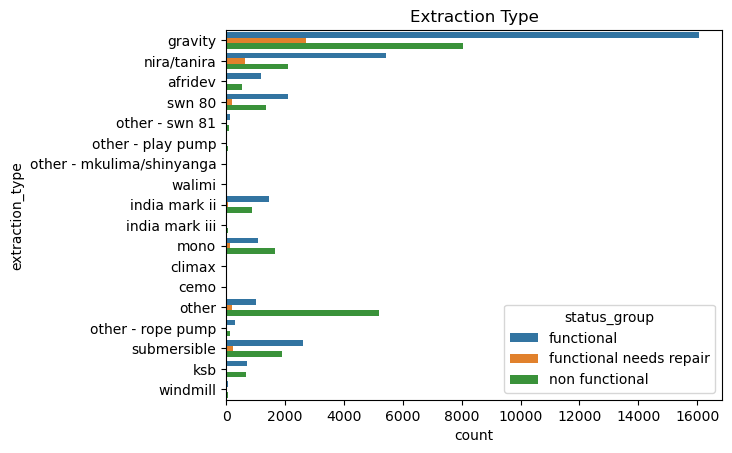

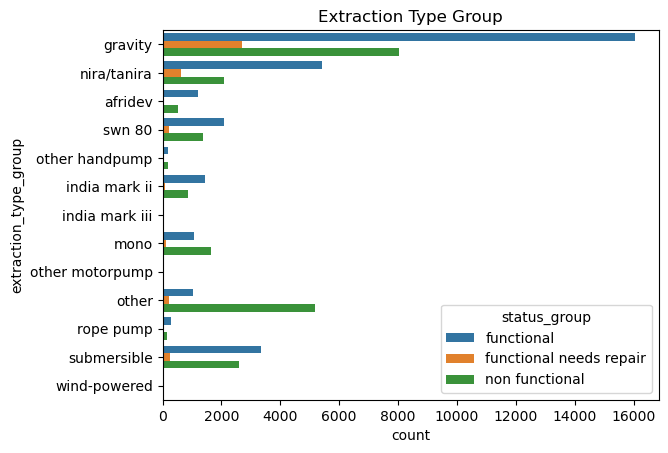

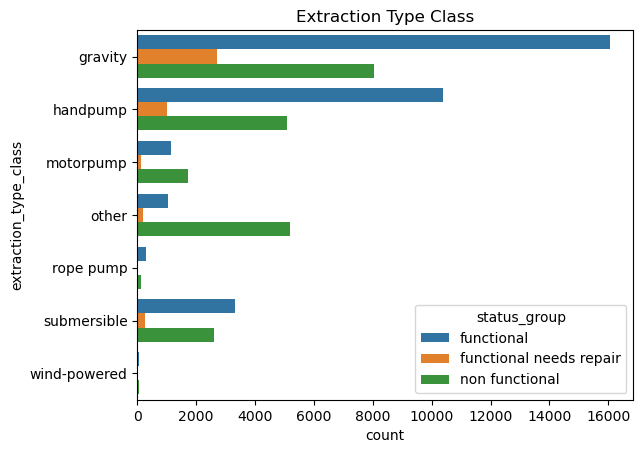

In [43]:
sns.countplot(data=df_combined, y='extraction_type', hue='status_group', dodge=1.0)
plt.title('Extraction Type')

plt.figure()
sns.countplot(data=df_combined, y='extraction_type_group', hue='status_group', dodge=1.0)
plt.title('Extraction Type Group')

plt.figure()
sns.countplot(data=df_combined, y='extraction_type_class', hue='status_group', dodge=1.0)
plt.title('Extraction Type Class')

Observations :
- extraction_type has **18** categories.
- extraction_type_group has **13** categories.
- extraction_type_class has **7** categories.
- All 3 columns represent the extraction method the waterpoint uses.

Suggestions :
- Use **extraction_type_class** as it could represent the dataset in least number of categories.
- Drop **extraction_type** and **extraction_type_group**.

## 2.11 Management / Management_Group

In [44]:
df_combined.sort_values(by='management', inplace=True)
print(df_combined['management'].unique())

df_combined.sort_values(by='management_group', inplace=True)
print(df_combined['management'].unique())

['company' 'other' 'other - school' 'parastatal' 'private operator'
 'trust' 'unknown' 'vwc' 'water authority' 'water board' 'wua' 'wug']
['company' 'private operator' 'water authority' 'trust' 'other'
 'other - school' 'parastatal' 'unknown' 'vwc' 'water board' 'wug' 'wua']


In [45]:
df_combined['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [46]:
df_combined['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [47]:
print(len(df_combined['management'].unique()))

print(len(df_combined['management_group'].unique()))

12
5


Text(0.5, 1.0, 'Management Group')

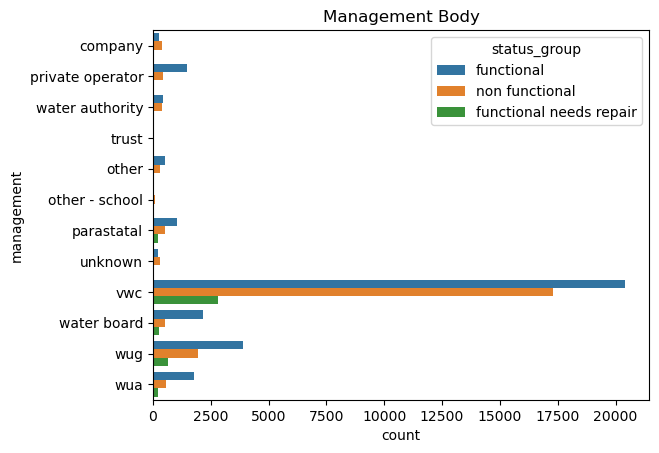

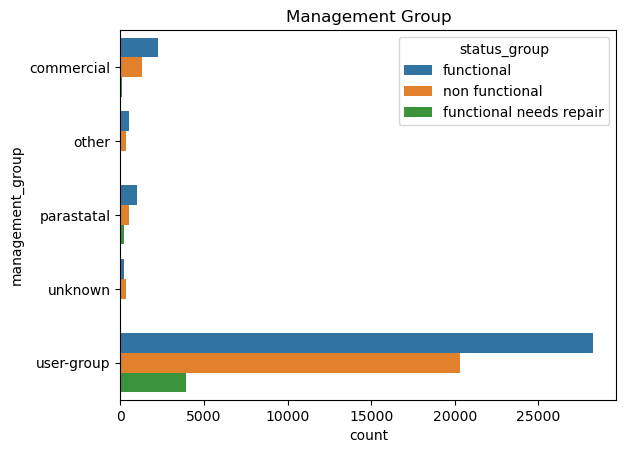

In [48]:
sns.countplot(data=df_combined, y='management', hue='status_group', dodge=1.0)
plt.title('Management Body')

plt.figure()
sns.countplot(data=df_combined, y='management_group', hue='status_group', dodge=1.0)
plt.title('Management Group')

Observations :
- extraction_type has **12** categories.
- extraction_type_group has **5** categories.
- Both columns represent the management of waterpoint.

Suggestions :
- Use management_group column and drop management column.

## 2.12 Payment / Payment_Type

In [49]:
df_combined.sort_values(by='payment', inplace=True)
print(df_combined['payment'].unique())

df_combined.sort_values(by='payment_type', inplace=True)
print(df_combined['payment_type'].unique())

['never pay' 'other' 'pay annually' 'pay monthly' 'pay per bucket'
 'pay when scheme fails' 'unknown']
['annually' 'monthly' 'never pay' 'on failure' 'other' 'per bucket'
 'unknown']


In [50]:
df_combined['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [51]:
df_combined['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [52]:
print(len(df_combined['payment'].unique()))

print(len(df_combined['payment_type'].unique()))

7
7


Text(0.5, 1.0, 'Payment Type')

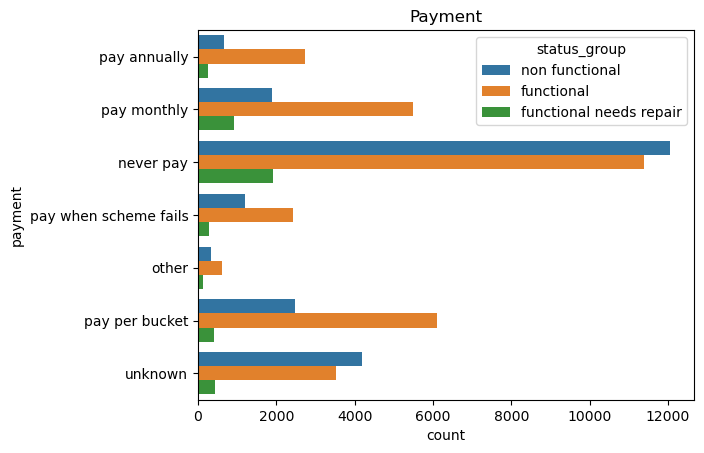

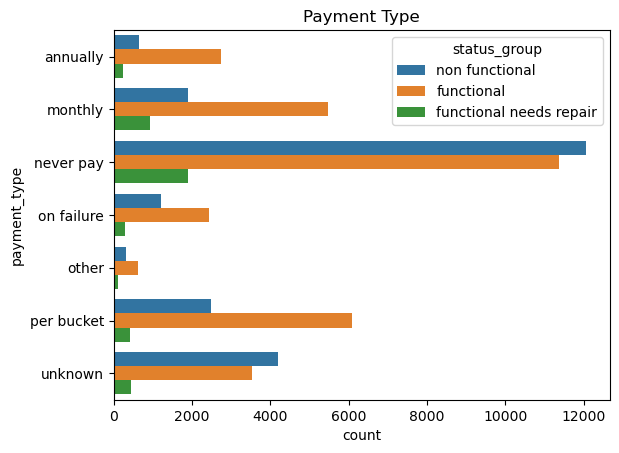

In [53]:
sns.countplot(data=df_combined, y='payment', hue='status_group', dodge=1.0)
plt.title('Payment')

plt.figure()
sns.countplot(data=df_combined, y='payment_type', hue='status_group', dodge=1.0)
plt.title('Payment Type')

Observations :
- Both **payment** and **payment_type** columns represent the same values.
- Both columns have the same number of classess at **7**.

Suggestions :
- Select either one and drop the other. (if applicable)

## 2.13 Water_Quality / Quality_Group

In [54]:
df_combined.sort_values(by='water_quality', inplace=True)
print(df_combined['water_quality'].unique())

df_combined.sort_values(by='quality_group', inplace=True)
print(df_combined['quality_group'].unique())

['coloured' 'fluoride' 'fluoride abandoned' 'milky' 'salty'
 'salty abandoned' 'soft' 'unknown']
['colored' 'fluoride' 'good' 'milky' 'salty' 'unknown']


In [55]:
df_combined['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [56]:
df_combined['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [57]:
print(len(df_combined['water_quality'].unique()))

print(len(df_combined['quality_group'].unique()))

8
6


Text(0.5, 1.0, 'Quality Group')

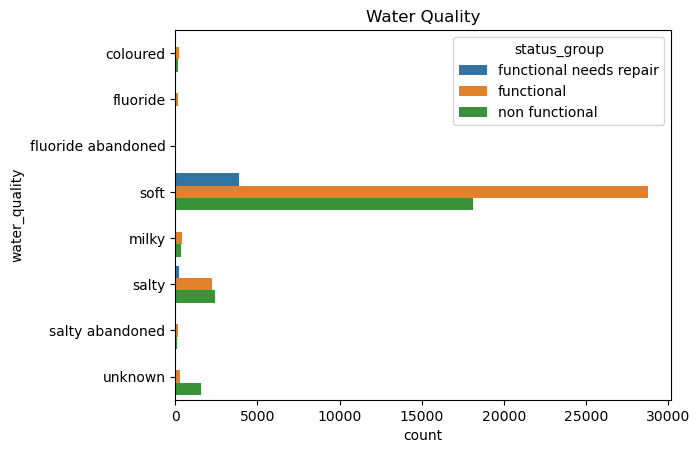

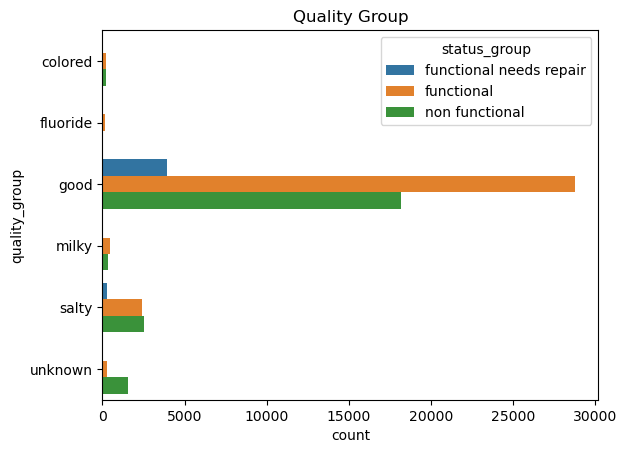

In [58]:
sns.countplot(data=df_combined, y='water_quality', hue='status_group', dodge=1.0)
plt.title('Water Quality')

plt.figure()
sns.countplot(data=df_combined, y='quality_group', hue='status_group', dodge=1.0)
plt.title('Quality Group')

Observations :
- water_quality has 8 categories while quality_group has 6 categories.

Suggestions :
- At first glance, might be advisable to use **water_quality** instead of **quality_group** as it is possible for water_quality to be abandoned but functional. (**To be reviewed during modelling stage**).

## 2.14 Quantity/Quantity_Group

In [59]:
df_combined.sort_values(by='quantity', inplace=True)
print(df_combined['quantity'].unique())

df_combined.sort_values(by='quantity_group', inplace=True)
print(df_combined['quantity_group'].unique())

['dry' 'enough' 'insufficient' 'seasonal' 'unknown']
['dry' 'enough' 'insufficient' 'seasonal' 'unknown']


In [60]:
df_combined['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [61]:
df_combined['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [62]:
print(len(df_combined['quantity'].unique()))

print(len(df_combined['quantity_group'].unique()))

5
5


Text(0.5, 1.0, 'Quantity Group')

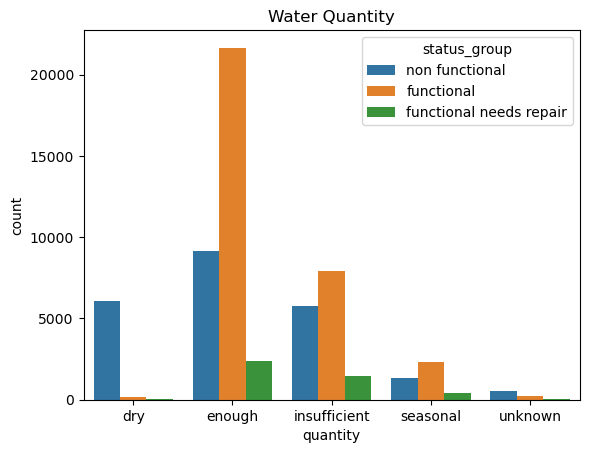

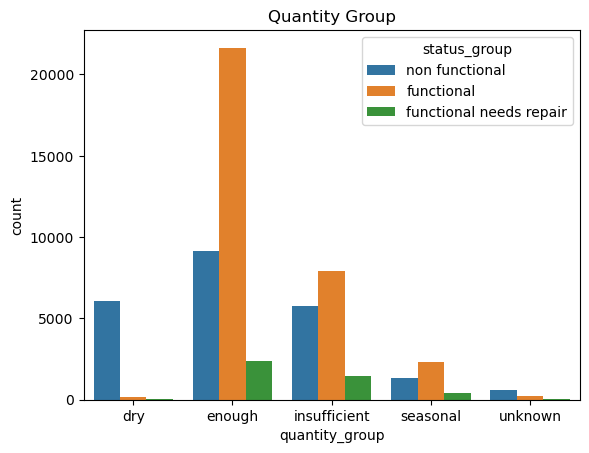

In [63]:
sns.countplot(data=df_combined, x='quantity', hue='status_group', dodge=1.0)
plt.title('Water Quantity')

plt.figure()
sns.countplot(data=df_combined, x='quantity_group', hue='status_group', dodge=1.0)
plt.title('Quantity Group')

Observations :
- Both **quantity** and **quantity_group** columns represent the same values.
- Both columns have the same number of classess at **5**.

Suggestions :
- Select either one and drop the other. (if applicable)

## 2.15 Source / Source_Type / Source_Class

In [64]:
df_combined.sort_values(by='source', inplace=True)
print(df_combined['source'].unique())

df_combined.sort_values(by='source_type', inplace=True)
print(df_combined['source_type'].unique())

df_combined.sort_values(by='source_class', inplace=True)
print(df_combined['source_class'].unique())

['dam' 'hand dtw' 'lake' 'machine dbh' 'other' 'rainwater harvesting'
 'river' 'shallow well' 'spring' 'unknown']
['borehole' 'dam' 'other' 'rainwater harvesting' 'river/lake'
 'shallow well' 'spring']
['groundwater' 'surface' 'unknown']


In [65]:
df_combined['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [66]:
df_combined['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [67]:
df_combined['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [68]:
print(len(df_combined['source'].unique()))

print(len(df_combined['source_type'].unique()))

print(len(df_combined['source_class'].unique()))

10
7
3


Text(0.5, 1.0, 'Source Class')

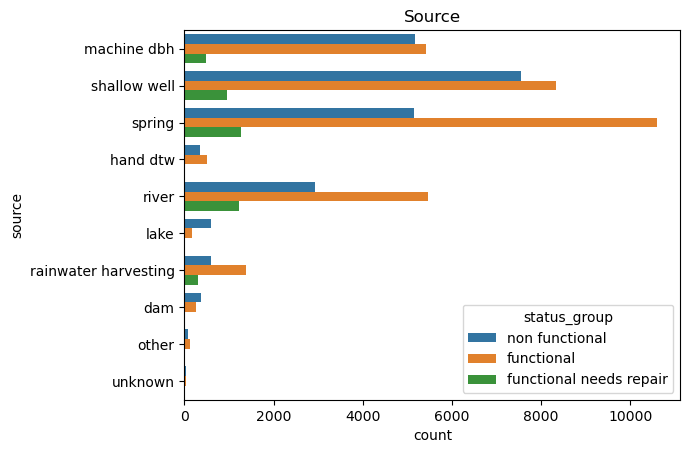

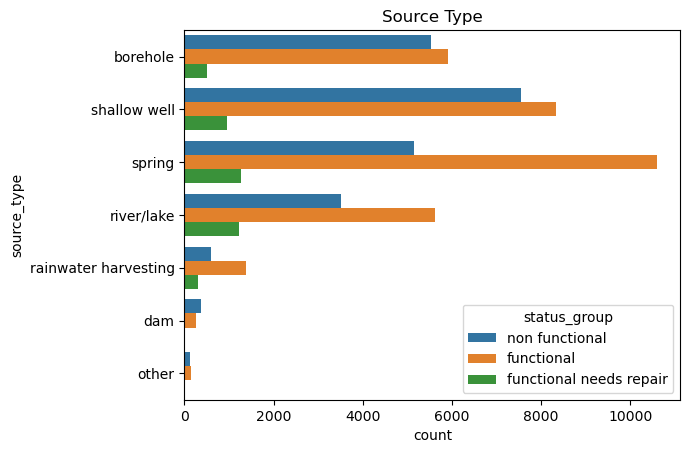

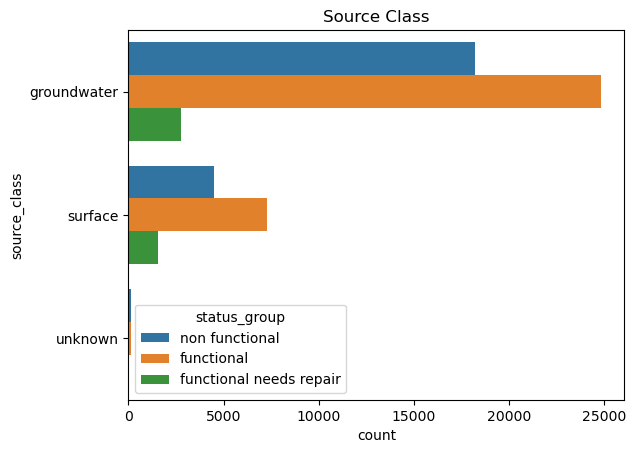

In [69]:
sns.countplot(data=df_combined, y='source', hue='status_group', dodge=1.0)
plt.title('Source')

plt.figure()
sns.countplot(data=df_combined, y='source_type', hue='status_group', dodge=1.0)
plt.title('Source Type')

plt.figure()
sns.countplot(data=df_combined, y='source_class', hue='status_group', dodge=1.0)
plt.title('Source Class')

Observations :
- Certain values in **source_type** can represent values in **source** column without the need of new categories.
- **source_class** column's data that is too abstract.

Suggestions :
- Use **source_type** instead of the other 2 columns.

## 2.16 Waterpoint_type / Waterpoint_type_group

In [70]:
df_combined.sort_values(by='waterpoint_type', inplace=True)
df_combined['waterpoint_type'].unique()

df_combined.sort_values(by='waterpoint_type_group', inplace=True)
df_combined['waterpoint_type_group'].unique()

array(['cattle trough', 'communal standpipe', 'dam', 'hand pump',
       'improved spring', 'other'], dtype=object)

In [71]:
df_combined['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [72]:
df_combined['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [73]:
print(len(df_combined['waterpoint_type'].unique()))

print(len(df_combined['waterpoint_type_group'].unique()))

7
6


Text(0.5, 1.0, 'Waterpoint Type Group')

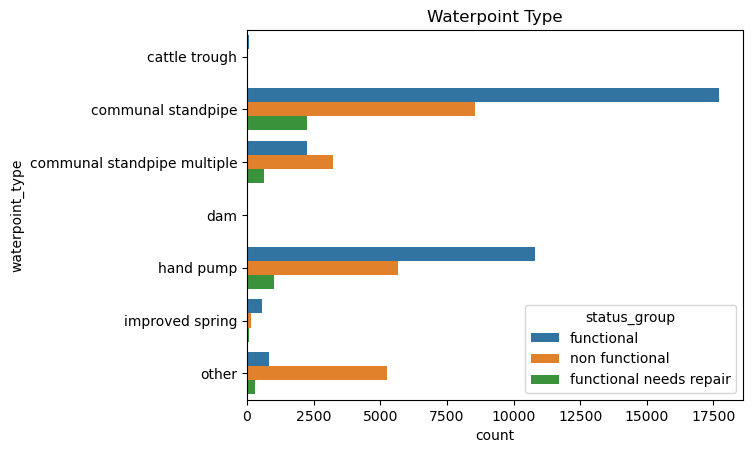

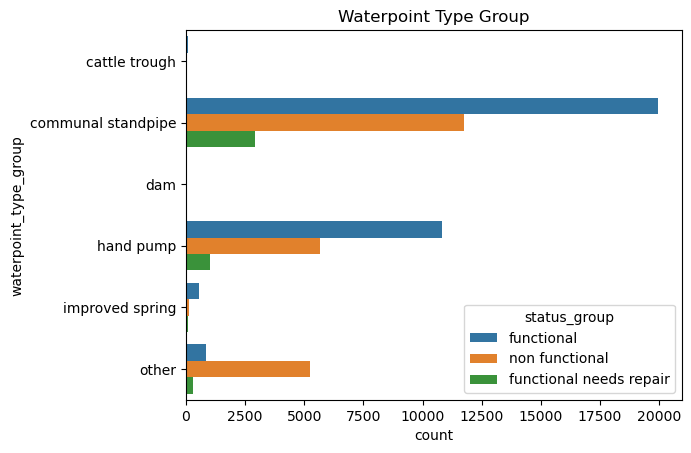

In [74]:
sns.countplot(data=df_combined, y='waterpoint_type', hue='status_group', dodge=1.0)
plt.title('Waterpoint Type')

plt.figure()
sns.countplot(data=df_combined, y='waterpoint_type_group', hue='status_group', dodge=1.0)
plt.title('Waterpoint Type Group')

Observations :
- Communal Standpipe in waterpoint_type_group can represent communal standpipe multiple in **waterpoint_type** column.

Suggestions :
- Use **waterpoint_type_group** and drop the other . (If applicable)

# 3.0 Data Cleaning

## 3.1 Longitude + Latitude Imputation

In [75]:
print(df_combined['longitude'].value_counts())

0.000000     1812
39.119210       2
37.534327       2
37.541579       2
37.281357       2
             ... 
37.171501       1
39.196225       1
39.149614       1
34.082145       1
35.164770       1
Name: longitude, Length: 57516, dtype: int64


In [76]:
print(df_combined['latitude'].value_counts())

-2.000000e-08    1812
-6.980220e+00       2
-2.494546e+00       2
-6.983606e+00       2
-6.957328e+00       2
                 ... 
-9.229706e+00       1
-3.295585e+00       1
-1.020479e+01       1
-3.395096e+00       1
-1.077290e+01       1
Name: latitude, Length: 57517, dtype: int64


In [77]:
df_combined['longitude'] = df_combined['longitude'].replace(0, np.nan)
df_combined['longitude'] = df_combined['longitude'].fillna(df_combined.groupby('region')['longitude'].transform('mean'))

df_combined['latitude'] = df_combined['latitude'].replace(-2.000000e-08, np.nan)
df_combined['latitude'] = df_combined['latitude'].fillna(df_combined.groupby('region')['latitude'].transform('mean'))

In [78]:
print(df_combined['longitude'].isnull().values.any())

print(df_combined['latitude'].isnull().values.any())

False
False


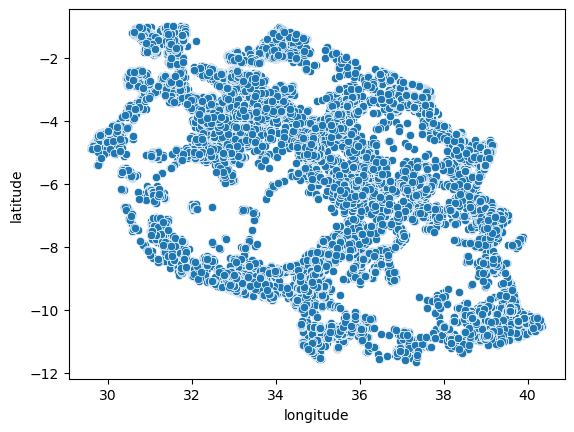

In [79]:
sns.scatterplot(data=df_combined, x='longitude', y='latitude')

## 3.2 Funder Column Binning

In [80]:
df_combined['funder'] = df_combined['funder'].fillna("Unknown")

In [81]:
#pd.set_option("display.max_rows", None)

In [82]:
df_combined['funder'].value_counts()

Government Of Tanzania    9084
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Dacp                         1
Care/dwe                     1
Villlage Contributi          1
Dom                          1
Legeza Legeza                1
Name: funder, Length: 1897, dtype: int64

In [83]:
# Data Cleaning
df_combined['funder'] = df_combined['funder'].replace(['Kkkt_makwale', 'Kkkt Church','Kkkt-dioces Ya Pare','Kkkt Dme','Kkkt Ndrumangeni',
                      'Kkkt Canal','Kkkt Mareu','Kkkt Usa','Kkkt Leguruki'], 'Kkkt')
df_combined['funder'] = df_combined['funder'].replace(['Hhesawa'], 'Hesawa')
df_combined['funder'] = df_combined['funder'].replace(['Nrwssp','Rwssp Shinyanga','Drwssp'], 'Rwssp')
df_combined['funder'] = df_combined['funder'].replace(['Tasafu','Tasaf 1','Tasaf Ii'], 'Tasaf')
df_combined['funder'] = df_combined['funder'].replace(['Kilindi District Co','Songea District Council','Sengerema District Council','Mbozi District Council',
                                                       'Sangea District Council','Cdtfdistrict Council','Mkinga  Distric Cou'], 'District Council')
df_combined['funder'] = df_combined['funder'].replace(['Dhv Moro'], 'Dhv')
df_combined['funder'] = df_combined['funder'].replace(['Germany Republi','Germany'], 'Germany')
df_combined['funder'] = df_combined['funder'].replace(['Tcrs Kibondo','Tcrst'], 'Tcrs')
df_combined['funder'] = df_combined['funder'].replace(['Netherland'], 'Netherlands')
df_combined['funder'] = df_combined['funder'].replace(['Ruangwa Lga'], 'Lga')
df_combined['funder'] = df_combined['funder'].replace(['Amrefe'], 'Amref')
df_combined['funder'] = df_combined['funder'].replace(['Oxfam Gb'], 'Oxfam')
df_combined['funder'] = df_combined['funder'].replace(['Unicet'], 'Unicef')
df_combined['funder'] = df_combined['funder'].replace(['Rc Church','Rc','Rc Ch','Rc Churc','Rc Mission','Rc Cathoric','Rc Njoro','Rc Mofu','Rc Mi','Rc Missionary',
                                                       'Rc Missi','Rc Msufi'], 'RC')
df_combined['funder'] = df_combined['funder'].replace(['Missionaries','Missionary','Neemia Mission','German Missionary','Germany Missionary','Cpps Mission',
                                                      'Heri Mission'], 'Mission')
df_combined['funder'] = df_combined['funder'].replace(['Private Owned','Private Institutions','Private Co','Private Person','Private Individul'], 'Private')
df_combined['funder'] = df_combined['funder'].replace(['Roman Catholic','Roman Cathoric-same','Roman Cathoric Same','Roman Church','Roman Catholic Rulenge Diocese',
                                                      'Roman Cathoric -kilomeni','Roman Ca','Roman Cathoric','Roman Cathoric Church'], 'Roman')
df_combined['funder'] = df_combined['funder'].replace(['Rural Water Supply And Sanitat','Rural Water Supply And Sanita','Rural Water Supply','Rural Water Department'], 'Rural Water Supply')
df_combined['funder'] = df_combined['funder'].replace(['Ces (gmbh)'], 'Ces(gmbh)')
df_combined['funder'] = df_combined['funder'].replace(['Dwsdp'], 'WSDP')
df_combined['funder'] = df_combined['funder'].replace(['Finwater'], 'Finw')
df_combined['funder'] = df_combined['funder'].replace(['Plan International','Plan Internatio'], 'Plan Int')
df_combined['funder'] = df_combined['funder'].replace(['Oikos E.Afrika'], 'Oikos')
df_combined['funder'] = df_combined['funder'].replace(['Concern World Wide'], 'Concern')
df_combined['funder'] = df_combined['funder'].replace(['African Development Bank','African Relie','African Muslim Agency','African Development Foundation','African Barrick Gold',
                                                      'African Realief Committe Of Ku','African 2000 Network','African Reflections Foundation'], 'African')
df_combined['funder'] = df_combined['funder'].replace(['Snv Ltd','Snv-swash'], 'Snv')
df_combined['funder'] = df_combined['funder'].replace(['Villagers Mpi'], 'Villagers')
df_combined['funder'] = df_combined['funder'].replace(['Halmashauri Ya Wilaya Sikonge','Halmashauri Ya Manispa Tabora','Halmashauri Ya Wilaya','Halmashauri Wil','Gra Na Halmashauri'], 'Halmashauri')

In [84]:
# Bin Values >1000 as individual Category,
# <1000 placed in others

def label_funder (row):
    if row['funder'] in ['Government Of Tanzania']:
        return "GOV"
    if row['funder'] in ['Unknown']:
        return "Unknown"
    if row['funder'] in ['Danida']:
        return "DANIDA"
    if row['funder'] in ['Hesawa']:
        return "HESAWA"
    if row['funder'] in ['Rwssp']:
        return "RWSSP"
    if row['funder'] in ['World Bank']:
        return "WORLD BANK"
    if row['funder'] in ['Kkkt']:
        return "ELCT"
    if row['funder'] in ['World Vision']:
        return "WORLD VISION"
    if row['funder'] in ['Unicef']:
        return "UNICEF"
    if row['funder'] in ['District Council']:
        return "DISTRICT COUNCIL"
    return "OTHER"

df_combined['funder_cat'] = df_combined.apply(lambda row: label_funder(row), axis=1)

In [85]:
df_combined['funder_cat'].value_counts()

OTHER               33766
GOV                  9084
Unknown              3639
DANIDA               3114
HESAWA               2203
ELCT                 1540
RWSSP                1381
WORLD BANK           1349
WORLD VISION         1246
UNICEF               1058
DISTRICT COUNCIL     1020
Name: funder_cat, dtype: int64

Text(0.5, 1.0, 'Funder Category')

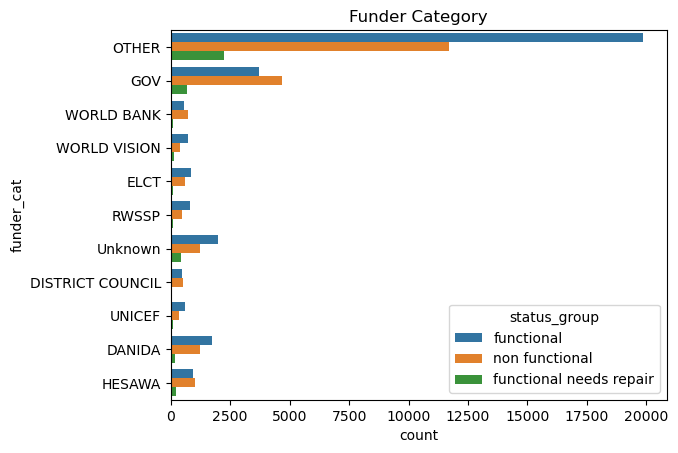

In [86]:
sns.countplot(data=df_combined, y='funder_cat', hue='status_group', dodge=1.0)
plt.title('Funder Category')

## 3.3 Installer Column Binning

In [87]:
df_combined['installer'] = df_combined['installer'].fillna("Unknown")

In [88]:
df_combined['installer'].value_counts()

DWE                           17402
Unknown                        3658
Government                     1825
RWE                            1206
Commu                          1060
                              ...  
Wamissionari wa kikatoriki        1
Justine Marwa                     1
MH Kapuya                         1
WUS                               1
Sister makulata                   1
Name: installer, Length: 2145, dtype: int64

In [89]:
# Data Cleaning
df_combined['installer'] = df_combined['installer'].replace(['Central government','Central Government','GOVERNMENT',
                                                             'Tanzania Government','central government','CENTRAL GOVERNMENT',
                                                            'Cental Government','Cebtral Government','Tanzanian Government','Centra Government',
                                                            'Tanzania government','TANZANIAN GOVERNMENT','Gover','Gove','Centr','Central govt','Centra govt'], 'Government')
df_combined['installer'] = df_combined['installer'].replace(['Commu','Communit','Sekei village community','Village Community','Olgilai village community','Village community','COMMU','Ngiresi village community',
                                                             'Oldadai village community','COMMUNITY','Ilwilo community','Maseka community','commu','Marumbo Community'], 'Community')
df_combined['installer'] = df_combined['installer'].replace(['DANIDA CO'], 'DANIDA')
df_combined['installer'] = df_combined['installer'].replace(['KKKT _ Konde and DWE','KKKT CHURCH','KkKT','KKKT-Dioces ya Pare','KKKT DME','Kkkt','KKKT Canal','KKKT Ndrumangeni','KKKT Kilinga','KKKT Katiti juu','KKKT MAREU','KKKT Leguruki'], 'KKKT')
df_combined['installer'] = df_combined['installer'].replace(['HESAWA','hesawa','HesaWa'], 'Hesawa')
df_combined['installer'] = df_combined['installer'].replace(['TCRS a','TCRS TWESA'], 'TCRS')
df_combined['installer'] = df_combined['installer'].replace(['TCRS a','TCRS TWESA'], 'TCRS')
df_combined['installer'] = df_combined['installer'].replace(['Danid','DANIDS'], 'DANID')
df_combined['installer'] = df_combined['installer'].replace(['District council','DISTRICT COUNCIL','District COUNCIL','Mbozi District Council','MBULU DISTRICT COUNCIL'], 'District Council')
df_combined['installer'] = df_combined['installer'].replace(['Lga'], 'LGA')
df_combined['installer'] = df_combined['installer'].replace(['world vision','WORLD VISION','world vision'], 'World Vision')
df_combined['installer'] = df_combined['installer'].replace(['Wedeco'], 'WEDECO')
df_combined['installer'] = df_combined['installer'].replace(['Amref'], 'AMREF')
df_combined['installer'] = df_combined['installer'].replace(['WUA','WUS'], 'WU')
df_combined['installer'] = df_combined['installer'].replace(['SEMA CO LTD','SEMA Consultant'], 'SEMA')
df_combined['installer'] = df_combined['installer'].replace(['da'], 'DA')
df_combined['installer'] = df_combined['installer'].replace(['Unicef'], 'UNICEF')
df_combined['installer'] = df_combined['installer'].replace(['Idara ya maji','Idara ya Maji'], 'Idara Ya Maji')
df_combined['installer'] = df_combined['installer'].replace(['sengerema Water Department','sengerema water Department'], 'Sengerema Water Department')
df_combined['installer'] = df_combined['installer'].replace(['Kiliwater r'], 'Kiliwater')
df_combined['installer'] = df_combined['installer'].replace(['NORAD/','Norad'], 'NORAD')
df_combined['installer'] = df_combined['installer'].replace(['Finwater','FinWater','FinWate'], 'Finw')
df_combined['installer'] = df_combined['installer'].replace(['villagers','VILLAGERS','Engarasero villagers'], 'Villagers')
df_combined['installer'] = df_combined['installer'].replace(['Distri','District water department','District Water Department','District water depar','Distric Water Department',], 'District')
df_combined['installer'] = df_combined['installer'].replace(['Magadini Makiwaru wa'], 'Magadini-Makiwaru wa')
df_combined['installer'] = df_combined['installer'].replace(['MWE &'], 'MWE')
df_combined['installer'] = df_combined['installer'].replace(['Handeni Trunk Main('], 'Handeni Trunk Main')
df_combined['installer'] = df_combined['installer'].replace(['Fini water','FINI WATER','FiNI WATER','FINI Water'], 'Fini Water')
df_combined['installer'] = df_combined['installer'].replace(['Shipo','SHIPO CONSTRUCTORS'], 'SHIPO')
df_combined['installer'] = df_combined['installer'].replace(['private','Private person','Private owned','PRIVATE INSTITUTIONS','Private Technician','Private individuals','Private company'], 'Private')
df_combined['installer'] = df_combined['installer'].replace(['KUWAIT','kuwait','Kuwaiti'], 'Kuwait')
df_combined['installer'] = df_combined['installer'].replace(['Jaica','JAICA CO'], 'JAICA')

In [90]:
# # Bin Values >1000 as individual Category,
# # <1000 placed in others

def label_installer (row):
    if row['installer'] in ['DWE']:
        return "DWE"
    if row['installer'] in ['Unknown']:
        return "Unknown"
    if row['installer'] in ['Government']:
        return "GOV"
    if row['installer'] in ['Community']:
        return "COMMUNITY"
    if row['installer'] in ['Hesawa']:
        return "HESAWA"
    if row['installer'] in ['RWE']:
        return "RWE"
    if row['installer'] in ['DANIDA']:
        return "DANIDA"
    if row['installer'] in ['KKKT']:
        return "ELCT"
    return "OTHER"

df_combined['installer_cat'] = df_combined.apply(lambda row: label_installer(row), axis=1)

In [91]:
df_combined['installer_cat'].value_counts()

OTHER        28170
DWE          17402
Unknown       3658
GOV           3610
COMMUNITY     1745
HESAWA        1395
RWE           1206
ELCT          1163
DANIDA        1051
Name: installer_cat, dtype: int64

Text(0.5, 1.0, 'Installer Category')

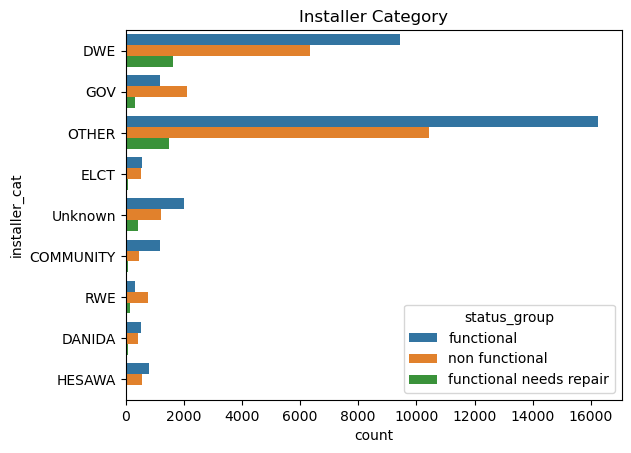

In [92]:
sns.countplot(data=df_combined, y='installer_cat', hue='status_group', dodge=1.0)
plt.title('Installer Category')

## 3.4 Construction Year Binning

In [93]:
# Function for Region Column Binning. 
# Binning done based on the decade.

def label_construction_year (row):
    if row['construction_year'] in [1960,1961,1962,1963,1964,1965,1966,1967,1968,1969]:
        return "60s"
    if row['construction_year'] in [1970,1971,1972,1973,1974,1975,1976,1977,1978,1979]:
        return "70s"
    if row['construction_year'] in [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989]:
        return "80s"
    if row['construction_year'] in [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999]:
        return "90s"
    if row['construction_year'] in [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]:
        return "2000s"
    if row['construction_year'] in [2010,2011,2012,2013]:
        return "2010s"
    return "Unknown"

df_combined['construction_decade'] = df_combined.apply(lambda row: label_construction_year(row), axis=1)

In [94]:
df_combined['construction_decade'].value_counts()

Unknown    20709
2000s      15330
90s         7678
80s         5578
2010s       5161
70s         4406
60s          538
Name: construction_decade, dtype: int64

Text(0.5, 1.0, 'Construction Decade')

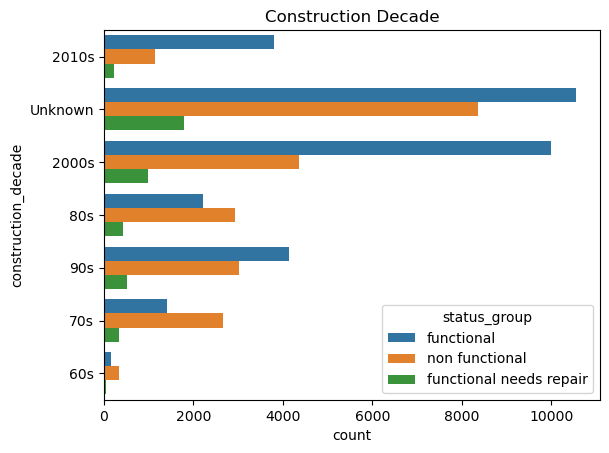

In [95]:
sns.countplot(data=df_combined, y='construction_decade', hue='status_group', dodge=1.0)
plt.title('Construction Decade')

## 3.5 Region Binning

In [96]:
# Function for Region Column Binning.
# Region Binning is done based on Data from Tanzania Water and Sanitation Network Website. 

def label_region (row):
    if row['region'] in ['Arusha','Manyara','Kilimanjaro','Tanga']:
        return "Northern Zone"
    if row['region'] in ['Kagera','Mwanza','Shinyanga','Mara']:
        return "Lake Zone"
    if row['region'] in ['Lindi','Ruvuma','Mtwara']:
        return "Southern Zone"
    if row['region'] in ['Rukwa','Mbeya','Iringa']:
        return "Southern Highlands"
    if row['region'] in ['Morogoro','Pwani','Dar es Salaam']:
        return "Coastal Zone"
    if row['region'] in ['Kigoma']:
        return "Western Zone"
    if row['region'] in ['Tabora','Singida','Dodoma']:
        return "Central Zone"
    return "Unknown"

df_combined['zones'] = df_combined.apply(lambda row: label_region(row), axis=1)

In [97]:
df_combined['zones'].value_counts()

Lake Zone             13369
Northern Zone         11859
Southern Highlands    11741
Coastal Zone           7446
Central Zone           6253
Southern Zone          5916
Western Zone           2816
Name: zones, dtype: int64

Text(0.5, 1.0, 'Zones')

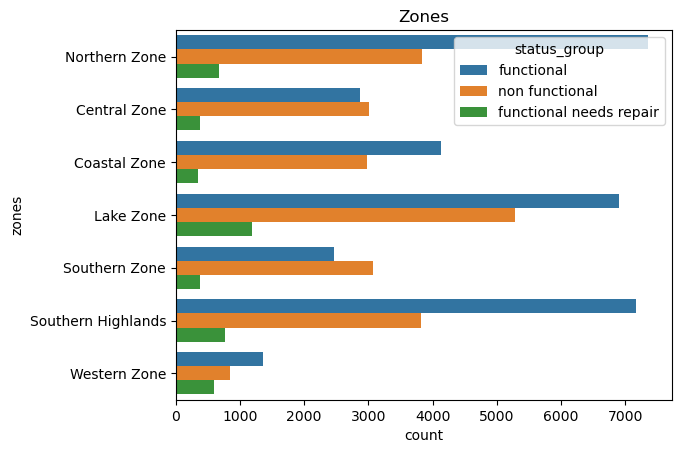

In [98]:
sns.countplot(data=df_combined, y='zones', hue='status_group', dodge=1.0)
plt.title('Zones')

## 3.6 Permit Column Missing Values

In [99]:
df_combined['permit'] = df_combined['permit'].fillna("Unknown")

In [100]:
df_combined['permit'].value_counts()

True       38852
False      17492
Unknown     3056
Name: permit, dtype: int64

Text(0.5, 1.0, 'Permit')

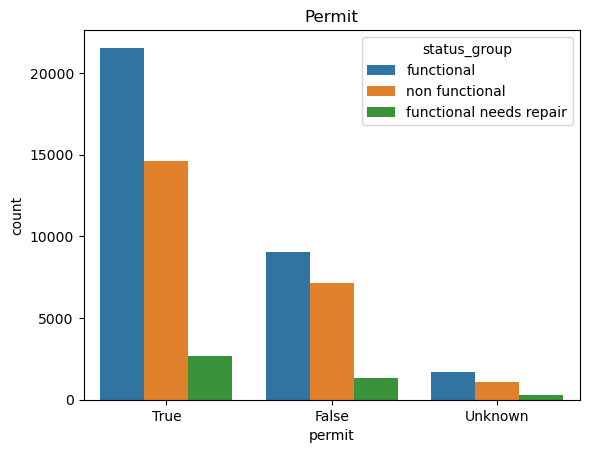

In [101]:
sns.countplot(data=df_combined, x='permit', hue='status_group', dodge=1.0)
plt.title('Permit')

## 3.7 Public Meeting Column Missing Values

In [102]:
df_combined['public_meeting'] = df_combined['public_meeting'].fillna("Unknown")

In [103]:
df_combined['public_meeting'].value_counts()

True       51011
False       5055
Unknown     3334
Name: public_meeting, dtype: int64

Text(0.5, 1.0, 'Public Meeting')

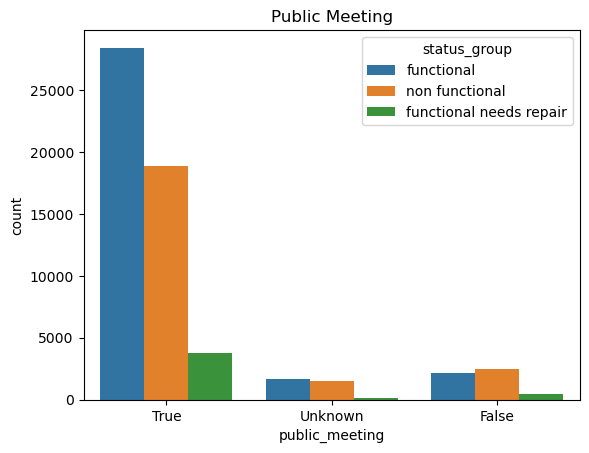

In [104]:
sns.countplot(data=df_combined, x='public_meeting', hue='status_group', dodge=1.0)
plt.title('Public Meeting')

## 3.8 Feature Encoding

In [105]:
df_combined['permit'] = df_combined['permit'].astype(str)
df_combined['public_meeting'] = df_combined['public_meeting'].astype(str)

In [106]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [107]:
df_combined = MultiColumnLabelEncoder(columns = ['basin','public_meeting','scheme_management','permit','extraction_type_class',
                                                'management','management_group','payment_type','water_quality','quantity',
                                                'source_type','source_class','waterpoint_type_group','funder_cat','installer_cat',
                                                'construction_decade','zones']).fit_transform(df_combined)

## 3.9 Target Variable Encoding

In [108]:
# Function for Target Variable Integer Encoding
def label_outcome (row):
    if row['status_group'] in ['functional']:
        return 0
    if row['status_group'] in ['functional needs repair']:
        return 1
    if row['status_group'] in ['non functional']:
        return 2
    return 999

df_combined['outcome'] = df_combined.apply(lambda row: label_outcome(row), axis=1)

In [109]:
df_combined['outcome'].value_counts()

0    32259
2    22824
1     4317
Name: outcome, dtype: int64

## 3.10 Delete Columns

In [110]:
# Delete Columns which are unimportant or redundant
df_clean = df_combined.drop(columns = ['id','date_recorded', 'wpt_name','num_private','subvillage','region_code','district_code','lga','ward','recorded_by',
                                      'scheme_name','extraction_type','extraction_type_group','payment','quality_group','quantity_group',
                                      'source','waterpoint_type','status_group','construction_year','region','funder','installer'])

In [111]:
df_clean.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type_class', 'management', 'management_group',
       'payment_type', 'water_quality', 'quantity', 'source_type',
       'source_class', 'waterpoint_type_group', 'funder_cat', 'installer_cat',
       'construction_decade', 'zones', 'outcome'],
      dtype='object')

## 3.11 Correlation Matrix

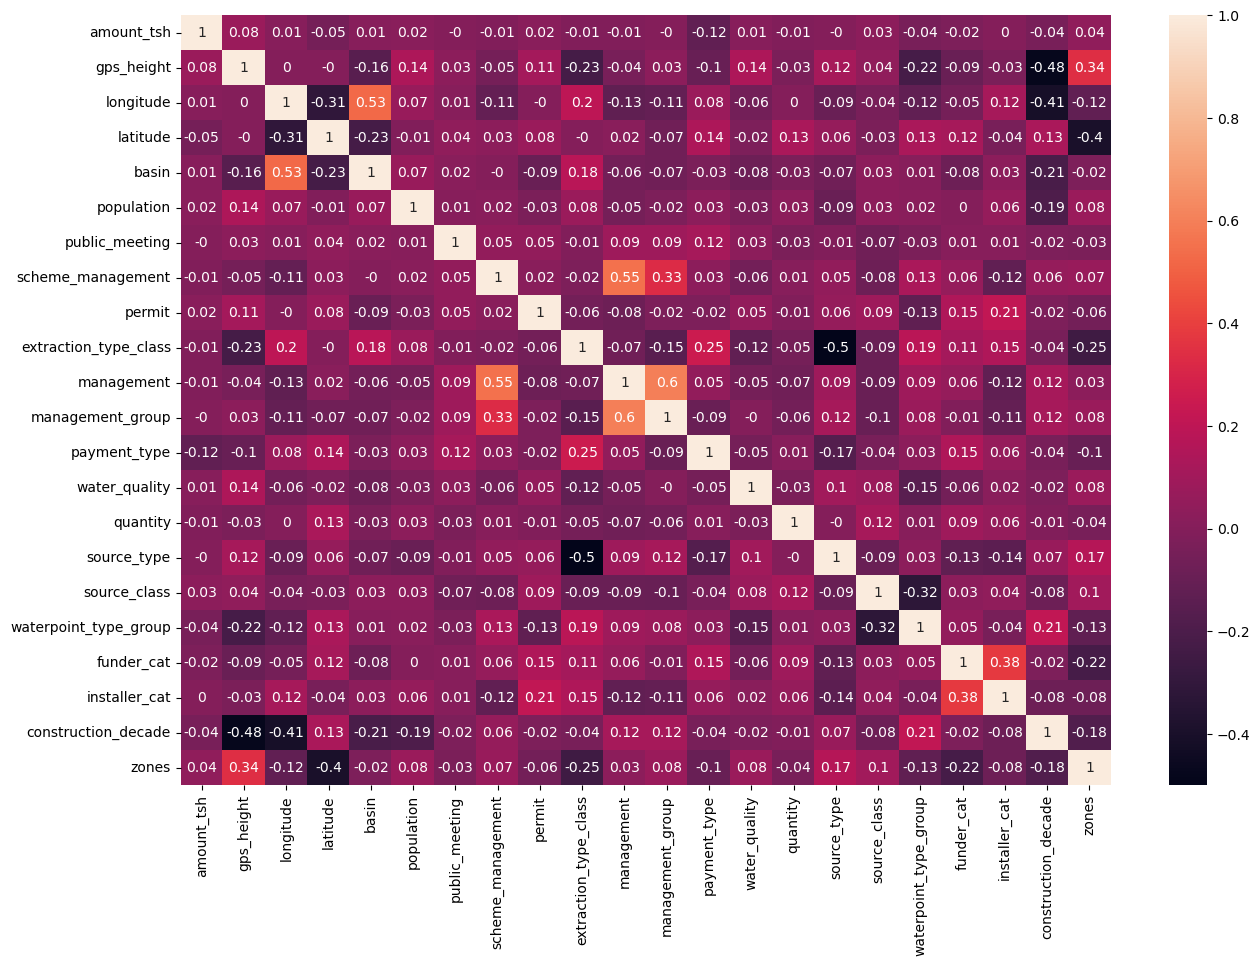

In [112]:
# Correlation Matrix
plt.figure(figsize=(15,10))
features = df_clean.drop(columns = ['outcome'])
matrix = features.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

# 4.0 Random Forest Feature Importance

In [113]:
target = df_clean.iloc[:,-1]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [115]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 0, 'Random Forest Feature Importance')

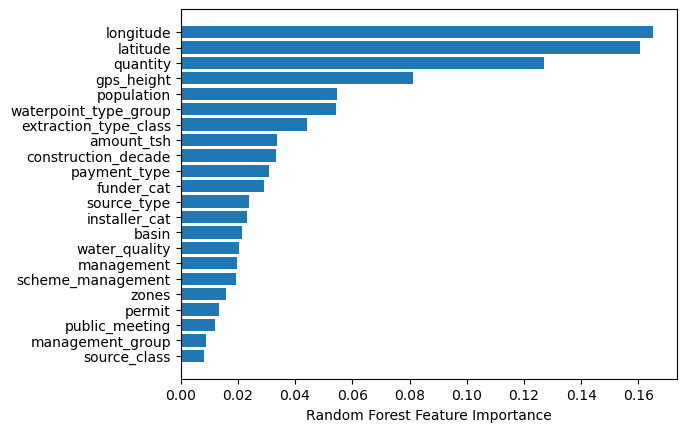

In [116]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 5.0 Simple Model (WIP)

In [117]:
# classification_target = df_clean['outcome']
# X_train, X_test, y_train, y_test = train_test_split(X_train, classification_target, test_size=0.3, random_state=42)

In [118]:
# decision = RandomForestClassifier(random_state=42)

# # Train the model
# decision.fit(X_train, y_train)

# decision_score = decision.score(X_test, y_test)

# print("Decision Tree's accuracy score is {:03.3f}".format(decision_score))